---
title: Fashion MNIST
categories: deep-learning
date: 2020-12-15
---


数据集State-of-the-Art详见

- [mnist](https://paperswithcode.com/sota/image-classification-on-mnist)
- [fashion-mnist](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)
- [cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

## 初始化

首先引入所用的包。然后是一些公共函数。下面代码比较长，可以先把函数的中文解释看过就好，细节忽略，后面用到再回来看。

In [1]:
import sys
from tensorflow.keras import Model, layers, regularizers, preprocessing

base_path = '/tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/code'
sys.path.append(base_path)

from image_classification import set_gpu_memory, lr_schedule, image_data_generator 
from image_classification import ImageClassificationHelper, ImageDataset

set_gpu_memory(1024)
model_results={}

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload

set max gpu memory to 1024


下面初始化模型运行的参数。

In [2]:
params = {
    'dataset_name': 'mnist',
    'validation_percent': 0,    
    'use_data_augmentation': False,
    'augmentation_generator': image_data_generator(),   
    'batch_size': 32,    
    'epochs': 120,    
    'learning_rate':0.001,
    'dropout':0.1,
    'metrics':['accuracy'], 
    'use_lr_schedule': False,
    'lr_schedule': lr_schedule,
    'model_params':{
        'mlp':{'dropout':0.4},
        'lenet':{'dropout':0.2},
        'custom':{'dropout':0.3},
        'vgg':{'dropout':0.4},
        'resnet':{}
    }
}

helper = ImageClassificationHelper()
helper.set_params(params)
helper.set_model_results(model_results)
helper.set_data(ImageDataset(params))

load mnist data from source
train: (60000, 28, 28, 1) (60000,)
test: (10000, 28, 28, 1) (10000,)
create train, validation and test dataset


## 数据

MNIST数据集包含60,000张training图片和10,000张test图片，每张图片由$28\times28$ 个像素点构成，每个像素点用一个灰度值(0−255)表示。下面查看一下其中的图片。

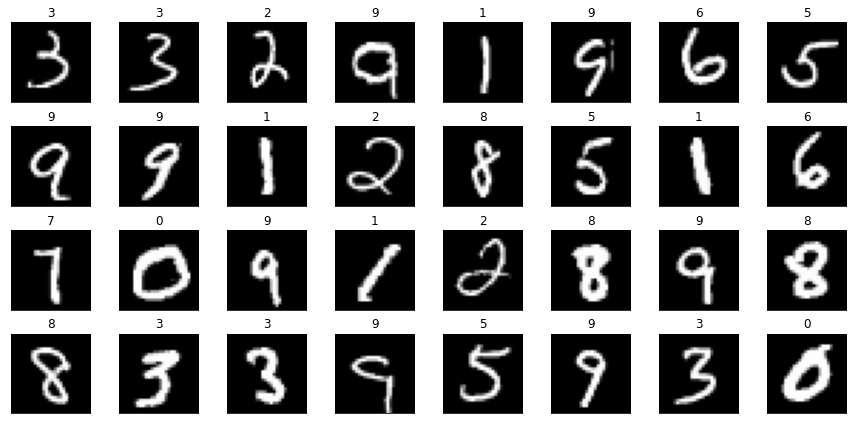

In [3]:
images, labels = iter(helper.data.train_dataset).next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

然后看看做了data augmentation的图片。

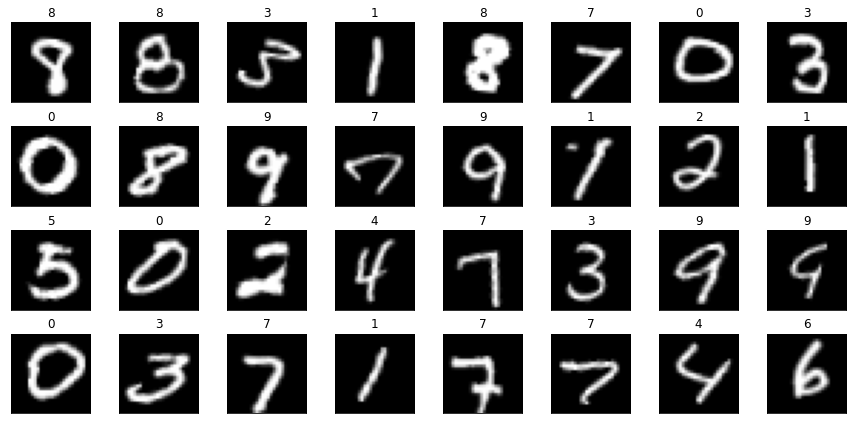

In [4]:
images, labels = helper.data.train_dataset_aug.next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

下面来看看各个class的数据分布。可以看到各个数字的分布还是比较均匀的。

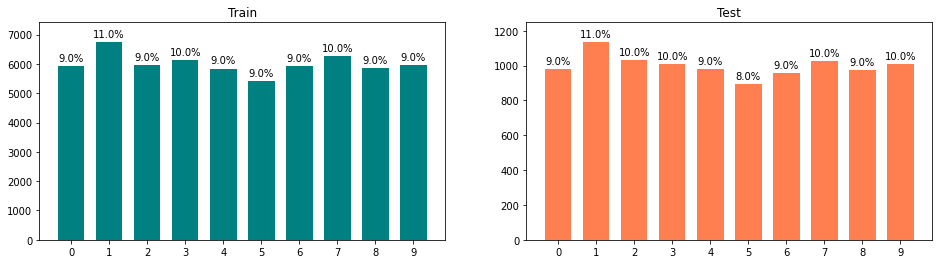

In [5]:
helper.plot_distribution()

## MLP

In [6]:
def get_mlp(helper, name='mlp', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Flatten()(input)
    x = layers.Dense(128, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model

model = get_mlp(helper)
model.summary()

dropout=0.4
learning_rate=0.001
checkpoint_path=./checkpoints/mnist/mlp/checkpoint
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________




下面来训练模型。

stopping_patience=40
learning_rate_patience=15


2020-12-25 10:08:41,738: INFO: start training


Epoch 1/120
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3524 - accuracy: 0.8957 - val_loss: 0.1514 - val_accuracy: 0.9570
Epoch 2/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1876 - accuracy: 0.9436 - val_loss: 0.1147 - val_accuracy: 0.9667
Epoch 3/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1521 - accuracy: 0.9542 - val_loss: 0.0948 - val_accuracy: 0.9698
Epoch 4/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1299 - accuracy: 0.9599 - val_loss: 0.0932 - val_accuracy: 0.9733
Epoch 5/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1171 - accuracy: 0.9635 - val_loss: 0.0853 - val_accuracy: 0.9753
Epoch 6/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1058 - accuracy: 0.9666 - val_loss: 0.0827 - val_accuracy: 0.9760
Epoch 7/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0

1875/1875 [==============================] - 20s 10ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0944 - val_accuracy: 0.9823
Epoch 55/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.0944 - val_accuracy: 0.9820
Epoch 56/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0952 - val_accuracy: 0.9826
Epoch 57/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0948 - val_accuracy: 0.9825
Epoch 58/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0224 - accuracy: 0.9924 - val_loss: 0.0962 - val_accuracy: 0.9822
Epoch 59/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.0955 - val_accuracy: 0.9822
Epoch 60/120
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0208 - accuracy: 0.9926 - val_loss: 0.0969 

2020-12-25 10:36:14,780: INFO: finish training [elapsed time: 1653.04 seconds]


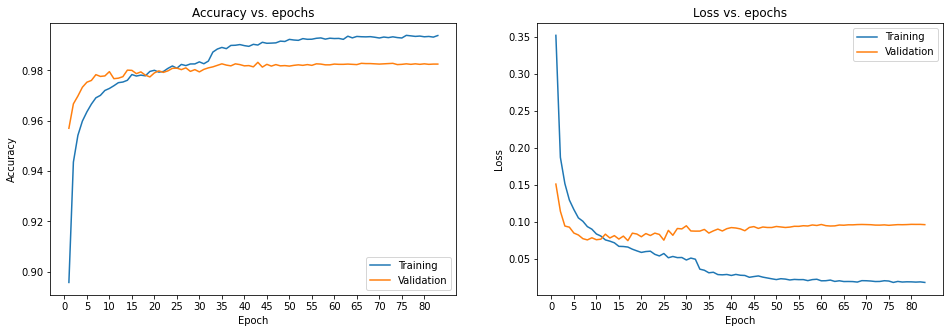

In [7]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.0884, Test Accuracy:98.32%
---------------------------------------- confusion matrix ----------------------------------------


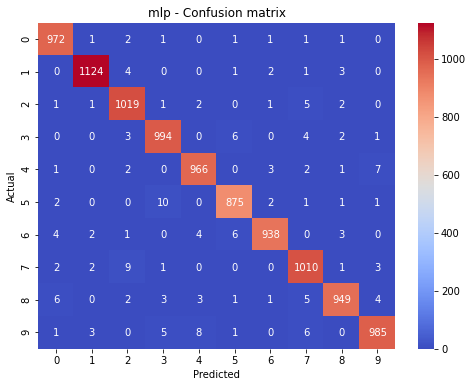

---------------------------------------- model improvement ----------------------------------------


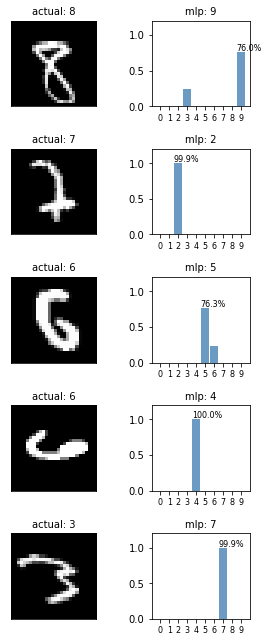

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
mlp,0.003634,0.9993,0.088429,0.9832,101770,1653.0


In [8]:
helper.model_summary(model, history=history)




从上面的错误来看，模型对一些细节的判断不是很准。下面来尝试一下LeNet。

## LeNet

![image-20201019113632136](images/image-20201019113632136.png)

LeNet诞生于1994年，是Yann LeCun等人提出的，是最早的卷积神经网络之一。在LeNet中，输入层是32×32的图片，而MNIST是28×28的图片，为了保持模型的结构不变，在第一个Conv2D设置参数padding=’same’。首先创建模型，并训练。

In [9]:
def get_lenet(helper, name='lenet', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(6, (5, 5), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(16, (5, 5), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(84, activation='relu')(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)  

    return model    

# 创建模型
model = get_lenet(helper)
model.summary()

dropout=0.2
learning_rate=0.001
checkpoint_path=./checkpoints/mnist/lenet/checkpoint
Model: "lenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
__________________________________________



下面来训练模型。

2020-12-25 10:36:29,048: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3044 - accuracy: 0.9049 - val_loss: 0.0611 - val_accuracy: 0.9825
Epoch 2/120
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1153 - accuracy: 0.9657 - val_loss: 0.0436 - val_accuracy: 0.9864
Epoch 3/120
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0382 - val_accuracy: 0.9883
Epoch 4/120
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0779 - accuracy: 0.9770 - val_loss: 0.0353 - val_accuracy: 0.9886
Epoch 5/120
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0688 - accuracy: 0.9798 - val_loss: 0.0376 - val_accuracy: 0.9882
Epoch 6/120
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0636 - accuracy: 0.9813 - val_loss: 0.0316 - val_accuracy: 0.9899
Epoch 7/120
1875/1875 [==============================] - 17s 9ms/step - loss

1875/1875 [==============================] - 15s 8ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.0226 - val_accuracy: 0.9947
Epoch 55/120
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0242 - val_accuracy: 0.9944
Epoch 56/120
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0228 - val_accuracy: 0.9945
Epoch 57/120
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0227 - val_accuracy: 0.9943
Epoch 58/120
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0231 - val_accuracy: 0.9943
Epoch 59/120
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0232 - val_accuracy: 0.9943
Epoch 60/120
1874/1875 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9950
Epoch 00060: ReduceLROnPlateau 

2020-12-25 11:00:23,418: INFO: finish training [elapsed time: 1434.37 seconds]


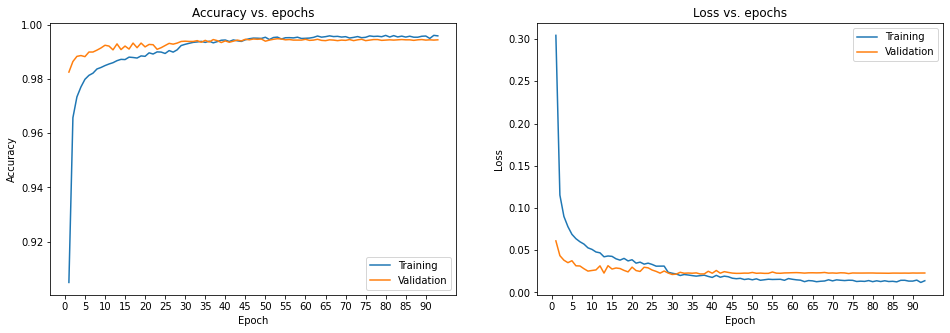

In [10]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和mlp模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.0226, Test Accuracy:99.48%
---------------------------------------- confusion matrix ----------------------------------------


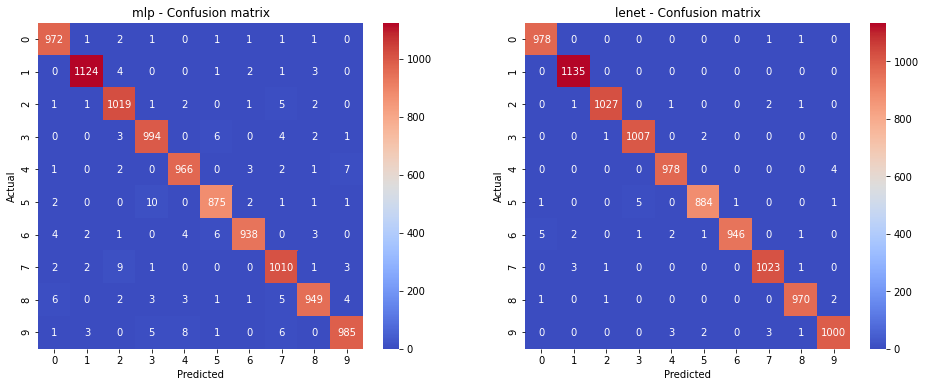

---------------------------------------- model improvement ----------------------------------------


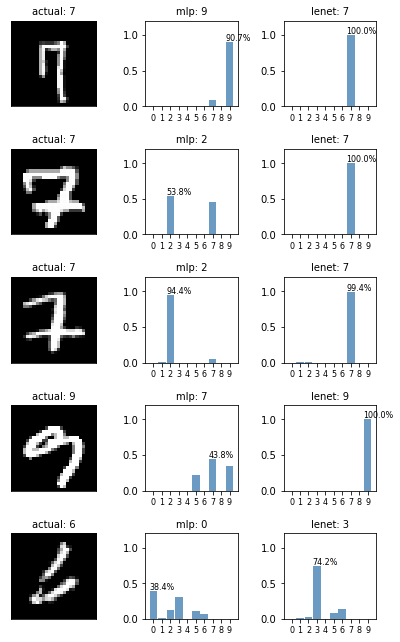

---------------------------------------- error analysis ----------------------------------------


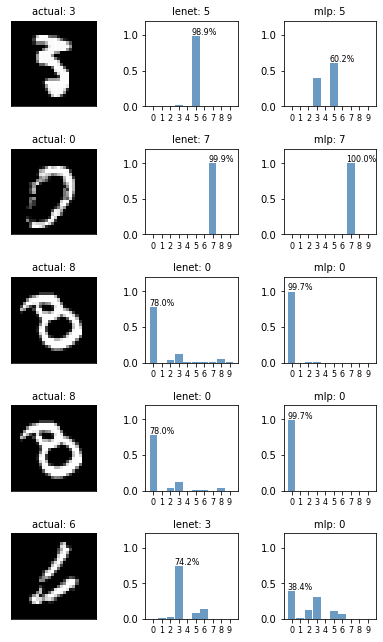

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
lenet,0.002152,0.9994,0.022595,0.9948,61750,1434.0
mlp,0.003634,0.9993,0.088429,0.9832,101770,1653.0


In [11]:
helper.model_summary(model, history=history)



从上面的图中，可以看到，Lenet的参数只有mlp的60%，但其的准确率比mlp提升了差不多1%。上面最后一张图中，有三列，第一列是数字图片，它们是mlp中分错的数字，第二列是mlp中的分类，第三列是lenet中的分类，可以看到lenet的确学到了一些mlp中没有的模式。下面再来看看哪些数字在lenet也分错了。


上图中，可以看到对于部分数字的识别，mlp甚至要更好一点啊，还有一些数字，则是一起都错了。

## Custom 1

下面自己定义一个模型，这个模型和lenet的主要区别是，增加了卷积的深度。

In [12]:
def get_custom1(helper, name='custom_cnn', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x) 
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)  
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model   

# 创建模型
model = get_custom1(helper)
model.summary()

dropout=0.3
learning_rate=0.001
checkpoint_path=./checkpoints/mnist/custom_cnn/checkpoint
Model: "custom_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
________________________________


可以发现参数的个数已经和mlp差不多了，下面来训练模型。

2020-12-25 11:00:42,377: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
   1/1875 [..............................] - ETA: 0s - loss: 5.7206 - accuracy: 0.0938WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0052s vs `on_train_batch_end` time: 0.0087s). Check your callbacks.


2020-12-25 11:00:44,322: WARNING: Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0052s vs `on_train_batch_end` time: 0.0087s). Check your callbacks.


1875/1875 [==============================] - 25s 14ms/step - loss: 0.3575 - accuracy: 0.8856 - val_loss: 0.0472 - val_accuracy: 0.9849
Epoch 2/120
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1145 - accuracy: 0.9658 - val_loss: 0.0397 - val_accuracy: 0.9878
Epoch 3/120
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0873 - accuracy: 0.9747 - val_loss: 0.0310 - val_accuracy: 0.9904
Epoch 4/120
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0765 - accuracy: 0.9774 - val_loss: 0.0257 - val_accuracy: 0.9921
Epoch 5/120
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.0296 - val_accuracy: 0.9907
Epoch 6/120
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0250 - val_accuracy: 0.9923
Epoch 7/120
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0552 - accuracy: 0.9836 - val_loss: 0.0259 - val_

Epoch 55/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0198 - val_accuracy: 0.9956
Epoch 56/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0195 - val_accuracy: 0.9954
Epoch 57/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0193 - val_accuracy: 0.9955
Epoch 58/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0191 - val_accuracy: 0.9955
Epoch 59/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0189 - val_accuracy: 0.9956
Epoch 60/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0191 - val_accuracy: 0.9955
Epoch 61/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0155 - accuracy: 0.9954 - val_

Epoch 107/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0184 - val_accuracy: 0.9957
Epoch 108/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0184 - val_accuracy: 0.9958
Epoch 109/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0185 - val_accuracy: 0.9956
Epoch 110/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0184 - val_accuracy: 0.9956
Epoch 111/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0184 - val_accuracy: 0.9956
Epoch 112/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0130 - accuracy: 0.9958 - val_loss: 0.0184 - val_accuracy: 0.9957
Epoch 113/120
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0122 - accuracy: 0.9959

2020-12-25 11:39:27,487: INFO: finish training [elapsed time: 2325.11 seconds]


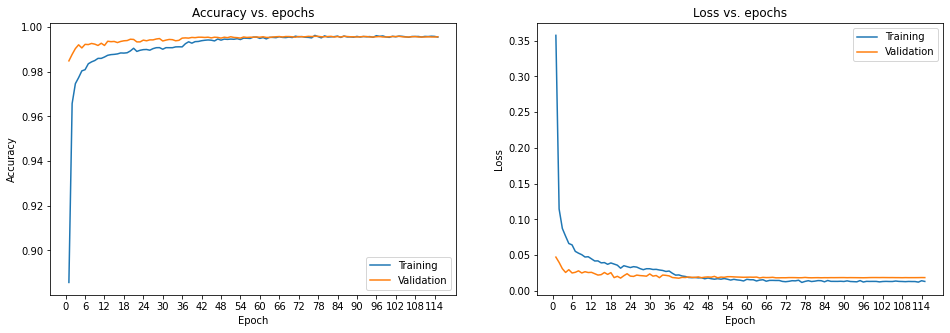

In [13]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)



下面来评估模型并和lenet模型进行对比。

---------------------------------------- evaluate ----------------------------------------
Test loss:0.0184, Test Accuracy:99.59%
---------------------------------------- confusion matrix ----------------------------------------


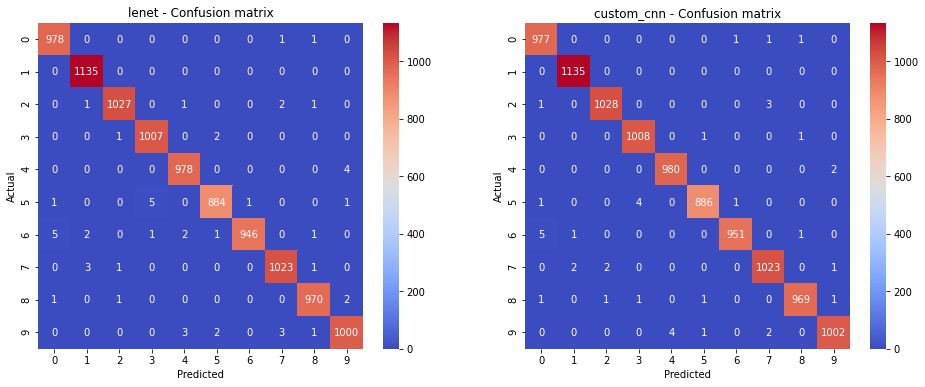

---------------------------------------- model improvement ----------------------------------------


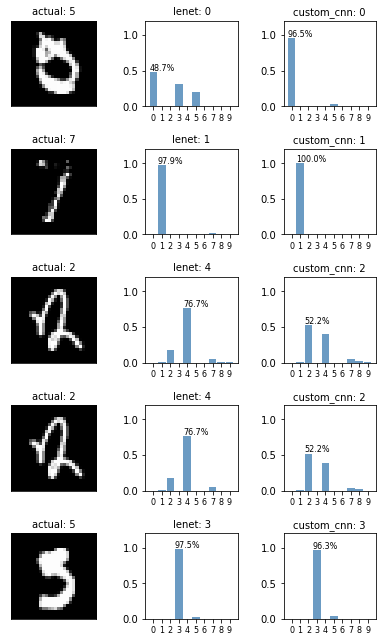

---------------------------------------- error analysis ----------------------------------------


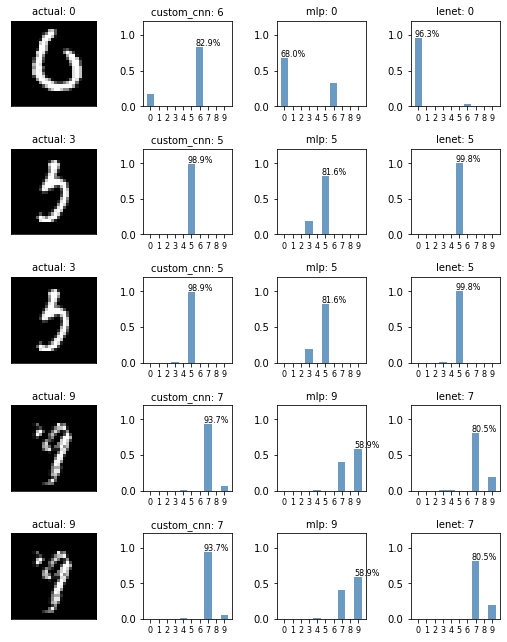

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
custom_cnn,0.001081,0.9997,0.018447,0.9959,73162,2325.0
lenet,0.002152,0.9994,0.022595,0.9948,61750,1434.0
mlp,0.003634,0.9993,0.088429,0.9832,101770,1653.0


In [14]:
helper.model_summary(model, history=history)



可以看到custom1模型的效果比lenet有些许提升（经过多次测试，平均好0.1-0.3个百分点）。上面最后一幅图，也能看到custom1模型学习到了不少新的模式。下面来看错误分析。

## VGG

In [15]:
def get_block(x, filters, conv_count, kernel_size=(3, 3), padding='same', use_bn=True, dropout=0, block_name='block'):
    for i in range(conv_count):
        x = layers.Conv2D(filters, kernel_size, padding=padding, name='{}_con{}'.format(block_name, i+1))(x)
        if use_bn: x = layers.BatchNormalization(name='{}_bn{}'.format(block_name, i+1))(x)
        x = layers.ReLU(name='{}_relu{}'.format(block_name, i+1))(x)
    x = layers.MaxPooling2D((2, 2), name='{}_maxpooling1'.format(block_name))(x)
    if dropout>0: x = layers.Dropout(dropout, name='{}_dropout1'.format(block_name))(x)
    return x
    
def get_vgg(helper, name='vgg',
              dense_layer_count=1, 
              dense_layer_units=128,
              conv_filters=64,
              block_count=3,
              use_bn=True,
              dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = input    
    for i in range(block_count): 
        x = get_block(x, conv_filters, conv_count=2, use_bn=use_bn, dropout=dropout, 
                      block_name='block{}'.format(i+1))
        conv_filters = conv_filters*2
                    
    x = layers.Flatten()(x)
    for i in range(dense_layer_count):
        x = layers.Dense(128, activation='relu')(x)
        if dropout>0: x = layers.Dropout(dropout)(x)    
    x = layers.Dense(10)(x)
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model


model = get_vgg(helper, dense_layer_count=1, block_count=3, name='vgg8')
model.summary()



dropout=0.4
learning_rate=0.001
checkpoint_path=./checkpoints/mnist/vgg8/checkpoint
Model: "vgg8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
block1_con1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
block1_bn1 (BatchNormalizati (None, 28, 28, 64)        256       
_________________________________________________________________
block1_relu1 (ReLU)          (None, 28, 28, 64)        0         
_________________________________________________________________
block1_con2 (Conv2D)         (None, 28, 28, 64)        36928     
_________________________________________________________________
block1_bn2 (BatchNormalizati (None, 28, 28, 64)        256       
____________________________________________

2020-12-25 11:39:46,400: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
   1/1875 [..............................] - ETA: 0s - loss: 5.3105 - accuracy: 0.0625WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0057s vs `on_train_batch_end` time: 0.0160s). Check your callbacks.


2020-12-25 11:39:48,923: WARNING: Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0057s vs `on_train_batch_end` time: 0.0160s). Check your callbacks.


1875/1875 [==============================] - 39s 21ms/step - loss: 0.5169 - accuracy: 0.8180 - val_loss: 0.0578 - val_accuracy: 0.9835
Epoch 2/120
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1426 - accuracy: 0.9574 - val_loss: 0.0326 - val_accuracy: 0.9917
Epoch 3/120
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0944 - accuracy: 0.9732 - val_loss: 0.0316 - val_accuracy: 0.9910
Epoch 4/120
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0718 - accuracy: 0.9803 - val_loss: 0.0298 - val_accuracy: 0.9919
Epoch 5/120
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0590 - accuracy: 0.9844 - val_loss: 0.0216 - val_accuracy: 0.9931
Epoch 6/120
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0429 - accuracy: 0.9879 - val_loss: 0.0224 - val_accuracy: 0.9939
Epoch 7/120
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0423 - accuracy: 0.9885 - val_loss: 0.0227 - val_

1875/1875 [==============================] - 31s 17ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0257 - val_accuracy: 0.9970
Epoch 55/120
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0258 - val_accuracy: 0.9971
Epoch 56/120
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0264 - val_accuracy: 0.9968
Epoch 57/120
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0254 - val_accuracy: 0.9964
Epoch 58/120
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0254 - val_accuracy: 0.9961
Epoch 59/120
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0247 - val_accuracy: 0.9964
Epoch 60/120
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0250 

2020-12-25 12:35:11,954: INFO: finish training [elapsed time: 3325.55 seconds]


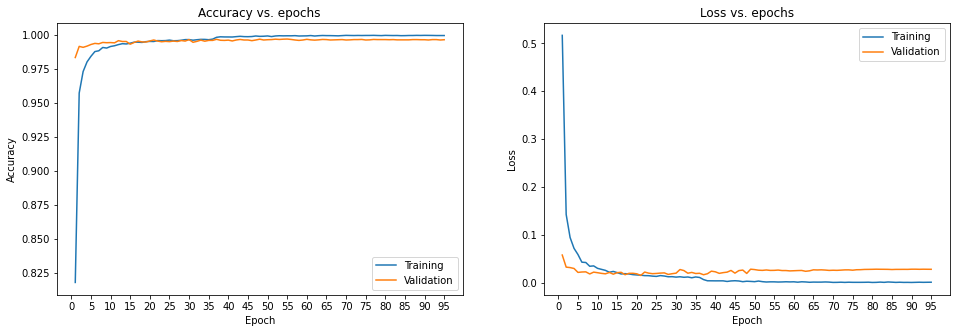

In [16]:
# 训练
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.0258, Test Accuracy:99.71%
---------------------------------------- confusion matrix ----------------------------------------


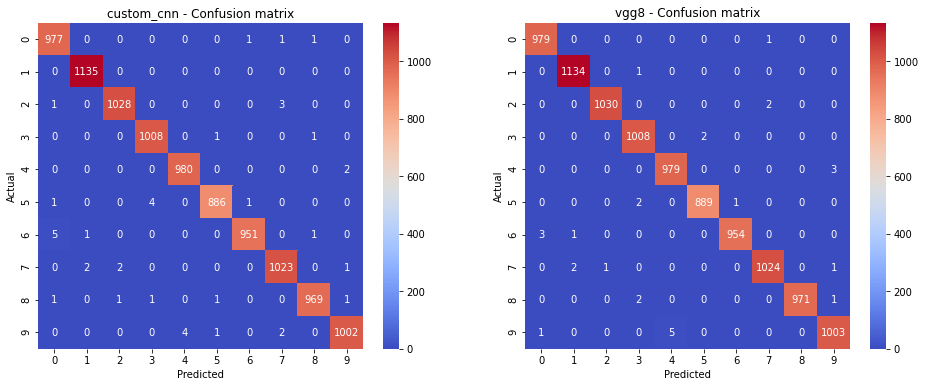

---------------------------------------- model improvement ----------------------------------------


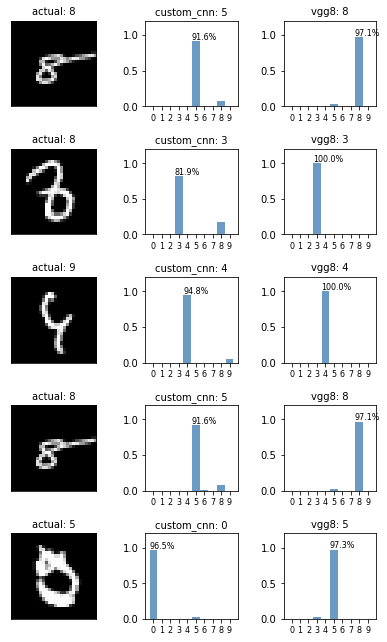

---------------------------------------- error analysis ----------------------------------------


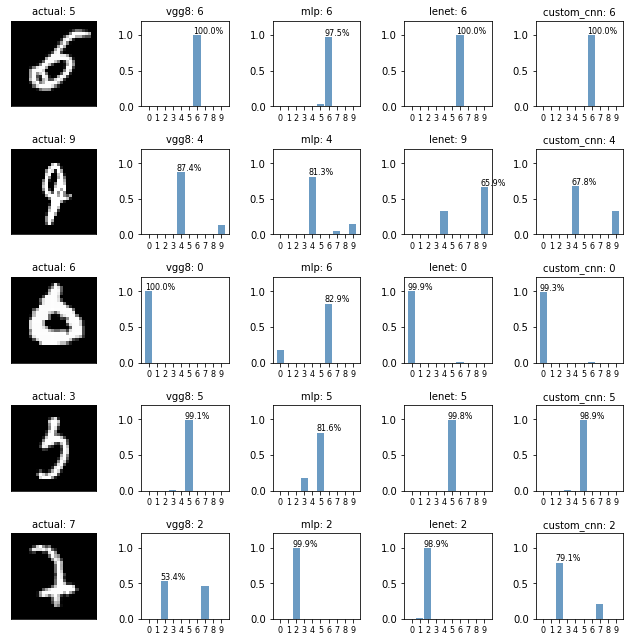

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.000107,0.9999,0.025848,0.9971,1442378,3325.0
custom_cnn,0.001081,0.9997,0.018447,0.9959,73162,2325.0
lenet,0.002152,0.9994,0.022595,0.9948,61750,1434.0
mlp,0.003634,0.9993,0.088429,0.9832,101770,1653.0


In [17]:
helper.model_summary(model, history=history)

## Resnet

参考https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py

In [18]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = layers.Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10, name='resnet_v1'):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = layers.add([x, y])
            x = layers.Activation('relu')(x)

        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = layers.AveragePooling2D(pool_size=7)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

def get_resnet_v1(helper, depth=32, name='resnet_v1'):       
    model = resnet_v1(helper.data.input_shape, depth=depth, name='{}_{}'.format(name, depth))
    helper.compile(model)
    return model

model = get_resnet_v1(helper, depth=20)
model.summary()

learning_rate=0.001
checkpoint_path=./checkpoints/mnist/resnet_v1_20/checkpoint
Model: "resnet_v1_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 28, 28, 16)   64          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization_5[0][0]      
_______

2020-12-25 12:35:34,159: INFO: start training


stopping_patience=40
learning_rate_patience=15
Epoch 1/120
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2813 - accuracy: 0.9592 - val_loss: 0.2434 - val_accuracy: 0.9662
Epoch 2/120
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1643 - accuracy: 0.9838 - val_loss: 0.1580 - val_accuracy: 0.9799
Epoch 3/120
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1341 - accuracy: 0.9855 - val_loss: 0.1634 - val_accuracy: 0.9727
Epoch 4/120
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1156 - accuracy: 0.9869 - val_loss: 0.1046 - val_accuracy: 0.9878
Epoch 5/120
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1026 - accuracy: 0.9881 - val_loss: 0.1369 - val_accuracy: 0.9764
Epoch 6/120
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0946 - accuracy: 0.9889 - val_loss: 0.1063 - val_accuracy: 0.9809
Epoch 7/120
1875/1875 [==============================] - 44s 24ms/step 

Epoch 55/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0215 - accuracy: 0.9989 - val_loss: 0.0356 - val_accuracy: 0.9942
Epoch 56/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0196 - accuracy: 0.9991 - val_loss: 0.0358 - val_accuracy: 0.9939
Epoch 57/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0189 - accuracy: 0.9988 - val_loss: 0.0377 - val_accuracy: 0.9942
Epoch 58/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0179 - accuracy: 0.9990 - val_loss: 0.0319 - val_accuracy: 0.9947
Epoch 59/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0171 - accuracy: 0.9991 - val_loss: 0.0326 - val_accuracy: 0.9944
Epoch 60/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0165 - accuracy: 0.9989 - val_loss: 0.0329 - val_accuracy: 0.9939
Epoch 61/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0155 - accuracy: 0.9991 - val_

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.0265 - val_accuracy: 0.9953
Epoch 110/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.0319 - val_accuracy: 0.9925
Epoch 111/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 0.0311 - val_accuracy: 0.9942
Epoch 112/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.0297 - val_accuracy: 0.9939
Epoch 113/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0048 - accuracy: 0.9999 - val_loss: 0.0285 - val_accuracy: 0.9942
Epoch 114/120
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.0319 - val_accuracy: 0.9939
Epoch 115/120
1874/1875 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9999
Epoch 00115: Reduce

2020-12-25 13:29:29,133: INFO: finish training [elapsed time: 3234.97 seconds]


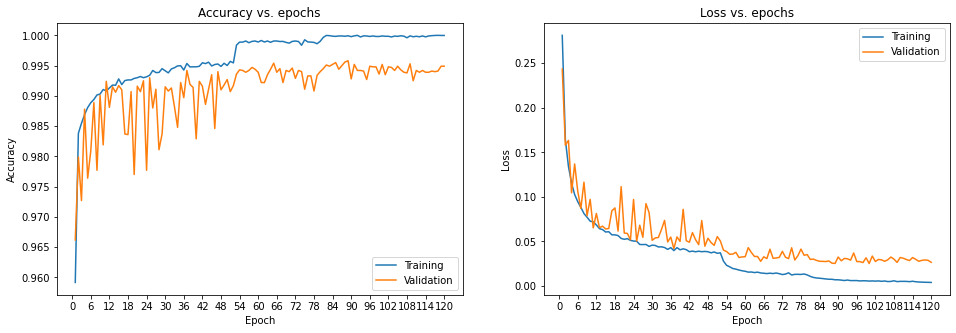

In [19]:
history = helper.train(model, epochs=helper.epochs)
helper.plot_history(history)

---------------------------------------- evaluate ----------------------------------------
Test loss:0.0253, Test Accuracy:99.58%
---------------------------------------- confusion matrix ----------------------------------------


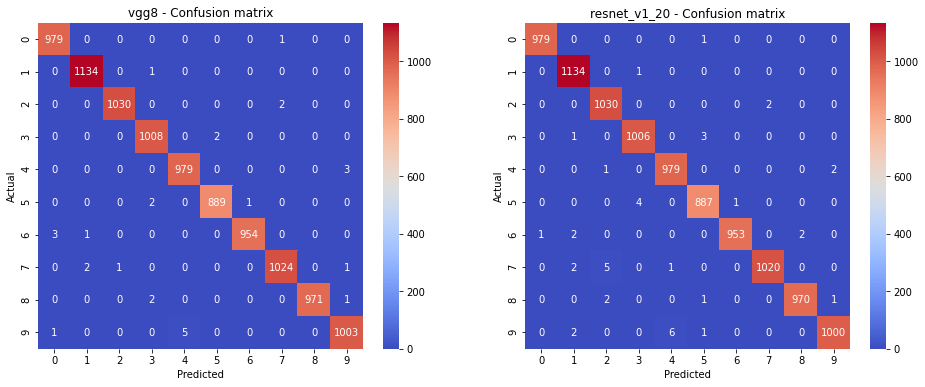

---------------------------------------- model improvement ----------------------------------------


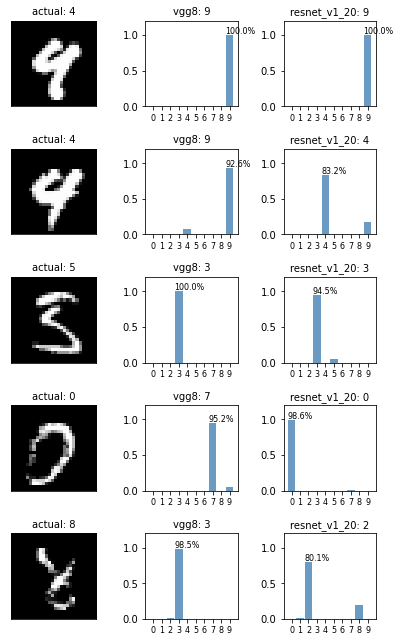

---------------------------------------- error analysis ----------------------------------------


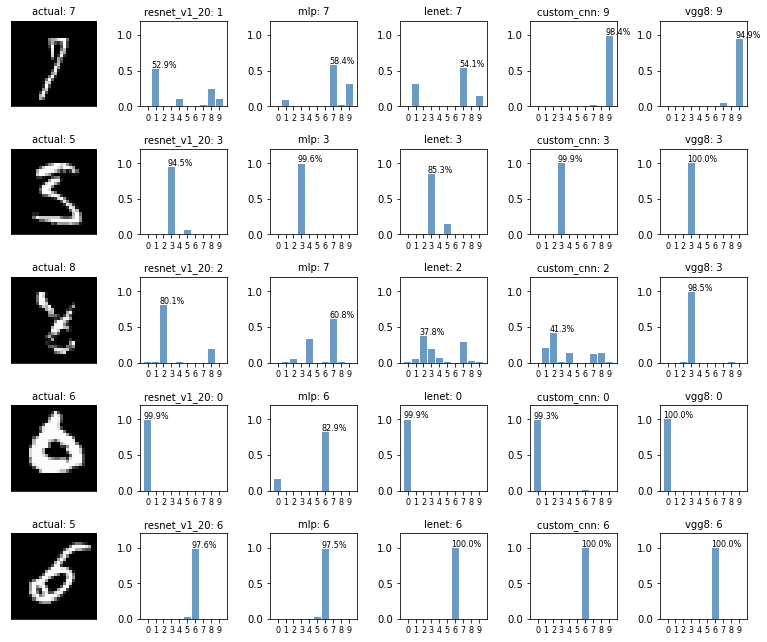

-------------------------------------------------- all models --------------------------------------------------


,train_loss,train_accuracy,test_loss,test_accuracy,weight_number,train_time
vgg8,0.000107,0.9999,0.025848,0.9971,1442378,3325.0
custom_cnn,0.001081,0.9997,0.018447,0.9959,73162,2325.0
resnet_v1_20,0.006556,1.0000,0.025292,0.9958,272778,3234.0
lenet,0.002152,0.9994,0.022595,0.9948,61750,1434.0
mlp,0.003634,0.9993,0.088429,0.9832,101770,1653.0


In [20]:
helper.model_summary(model, history=history)

## 总结